In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [10]:
df.shape

(366, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [13]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [14]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [15]:
df.rename(str.strip,
          axis='columns',
          inplace=True)

df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [16]:
for col in df.columns:

  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)

df.isnull().sum().sum()

0

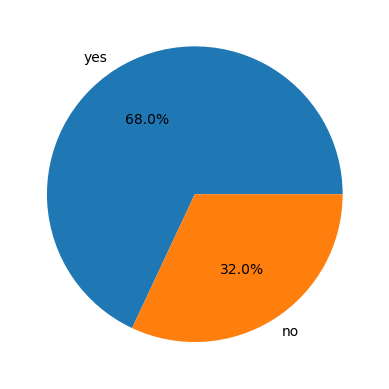

In [17]:
plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [18]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [19]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


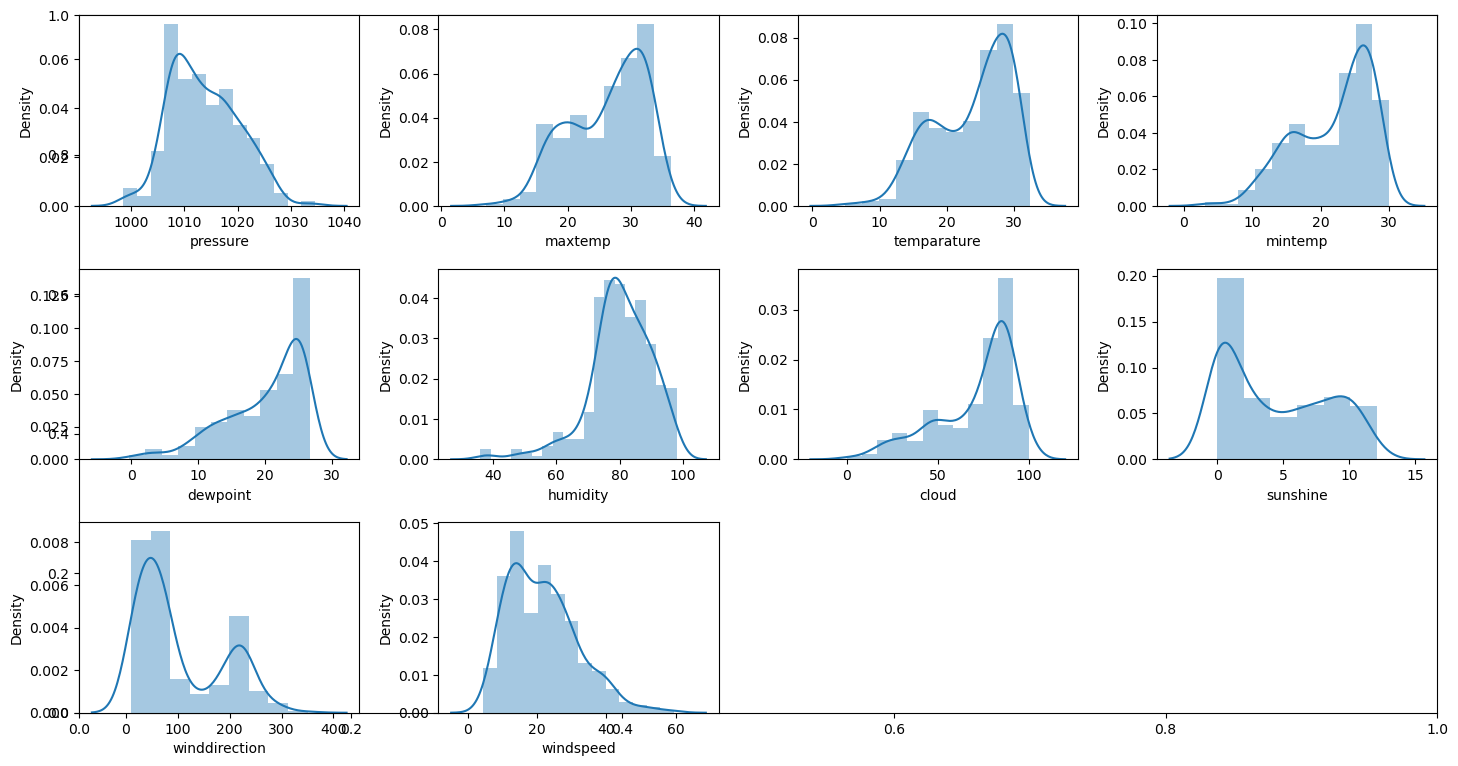

In [20]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

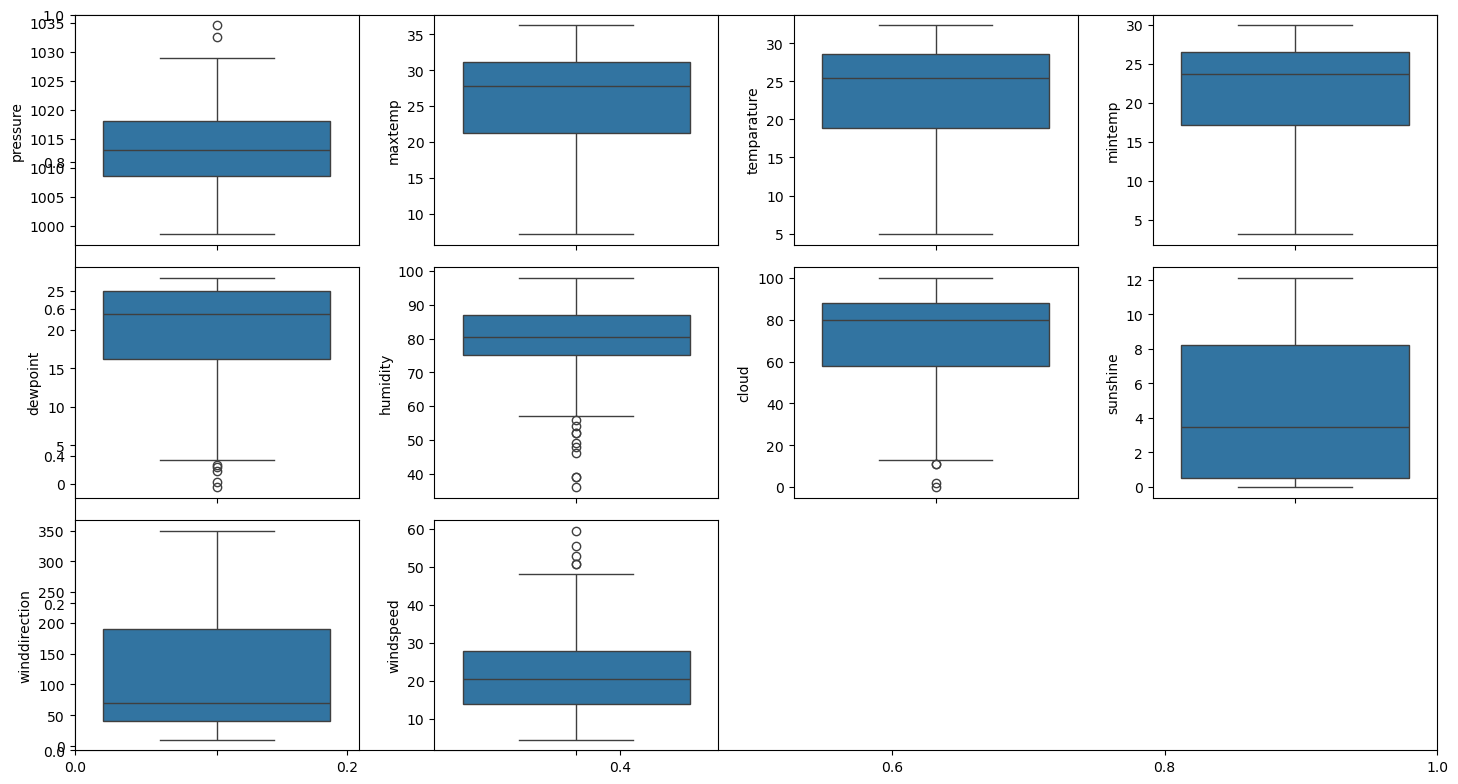

In [21]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [22]:
df.replace({'yes':1, 'no':0}, inplace=True)

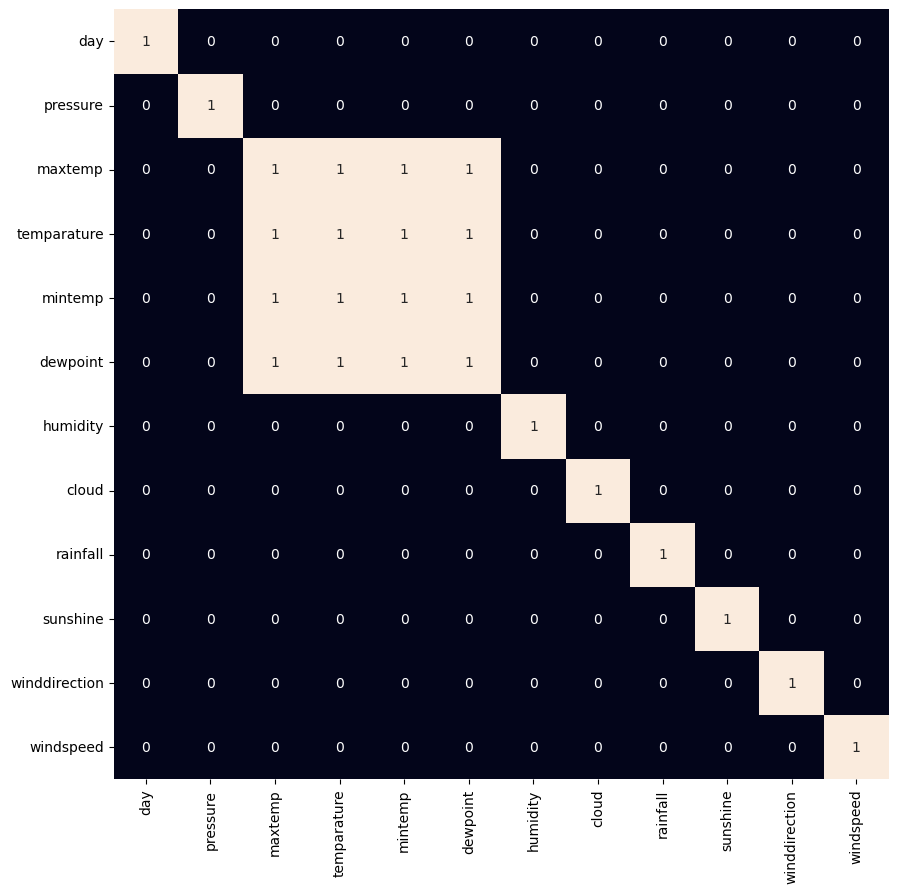

In [23]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [24]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [25]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [37]:
x_train, x_val, y_train, y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
x, y = ros.fit_resample(x_train, y_train)

In [38]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_val = scaler.transform(x_val)

In [39]:
models = [LogisticRegression(),  SVC(kernel='rbf', probability=True)]

for i in range(2):
  models[i].fit(x, y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(x)
  print('Training Accuracy : ', metrics.roc_auc_score(y, train_preds[:,1]))

  val_preds = models[i].predict_proba(x_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8893209767430116
Validation Accuracy :  0.8966666666666667

SVC(probability=True) : 
Training Accuracy :  0.9026413474407211
Validation Accuracy :  0.8858333333333333



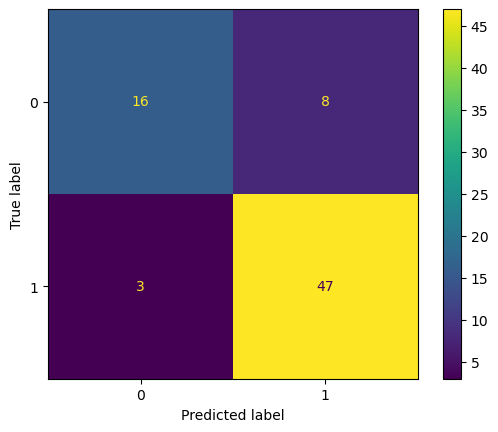

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(models[1], X_val, Y_val)
plt.show()

In [41]:
print(metrics.classification_report(Y_val, models[1].predict(X_val)))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74        24
           1       0.85      0.94      0.90        50

    accuracy                           0.85        74
   macro avg       0.85      0.80      0.82        74
weighted avg       0.85      0.85      0.85        74



In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

x_train (318, 8)
y_train (318,)
x_test (80, 8)
y_test (80,)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [46]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=model_lr.predict(x_test)
y_pred

array([ 0.98540393,  0.32114805,  0.69550229, -0.27010819, -0.14272151,
        0.94135152,  0.71507801,  0.90106515,  0.38148843, -0.46437458,
        0.93209946,  0.3844998 ,  0.33935784,  0.68226467,  0.34855532,
        0.73484631,  0.77193947,  0.17164675, -0.27010819,  0.17164675,
        0.43366381,  0.38148843,  0.32114805,  0.37986464,  0.01172701,
        0.67062083,  0.29615124,  0.71519334,  0.33194502,  0.82539707,
        1.00011474,  0.00150746,  0.82050433,  0.29782108,  0.42018192,
        0.66836491,  0.71149523,  0.39735143,  0.11212102,  0.48352099,
        0.17164675,  0.74130633,  0.40634653,  0.07857954,  0.77326816,
        0.40887893,  0.81093092,  0.49088165,  0.26547979,  0.67458865,
        0.79765219,  0.38126999, -0.31553718,  0.73176286,  0.76282141,
        0.99071215,  0.70580315,  0.89358412,  0.12947396,  0.41918521,
        0.79991818,  0.19582734,  0.92814495,  0.25260018, -0.28055276,
        0.13048418,  0.7574326 ,  0.3796077 ,  0.25260018,  0.31

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
rmse

0.39427713938627257

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
select_models=[LinearRegression(),
              DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5),
              RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

In [50]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse} and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("---------")
    print(f"List of R Square {my_r_square}")
    adj_r_sqaured_test= 1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r2_squared_test")
    adj_r2_square_value.append(adj_r_sqaured_test)
    print(f"Adjusted R Square{adj_r2_square_value} of model {model}")

RMSE value [0.39427713938627257] and R Squared value [-0.31012630785257667] of model LinearRegression()
List of Rmse [0.39427713938627257]
---------
List of R Square [-0.31012630785257667]
LinearRegression(),adj_r2_squared_test
Adjusted R Square[-0.4577461735261066] of model LinearRegression()
RMSE value [0.39427713938627257, 0.38290283798025493] and R Squared value [-0.31012630785257667, 0.36128876724761383] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.39427713938627257, 0.38290283798025493]
---------
List of R Square [-0.31012630785257667, 0.36128876724761383]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r2_squared_test
Adjusted R Square[-0.4577461735261066, 0.28932130440227455] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
RMSE value [0.39427713938627257, 0.38290283798025493, 0.30079240213813213] and R Squared value [-0.31012630785257667, 0.36128876724761383, 0.22098690881190164] of model Rand

In [51]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.39427713938627257, 0.38290283798025493, 0.30079240213813213],
 [-0.31012630785257667, 0.36128876724761383, 0.22098690881190164],
 [-0.4577461735261066, 0.28932130440227455, 0.13321078586113]]

In [52]:
a=pd.DataFrame(data=result,columns=["LinearRegression","DecisionTree","RandomForest"],index=["my_rmse","my_r_square","adj_r2_square_value"])
a

,LinearRegression,DecisionTree,RandomForest
my_rmse,0.394277,0.382903,0.300792
my_r_square,-0.310126,0.361289,0.220987
adj_r2_square_value,-0.457746,0.289321,0.133211


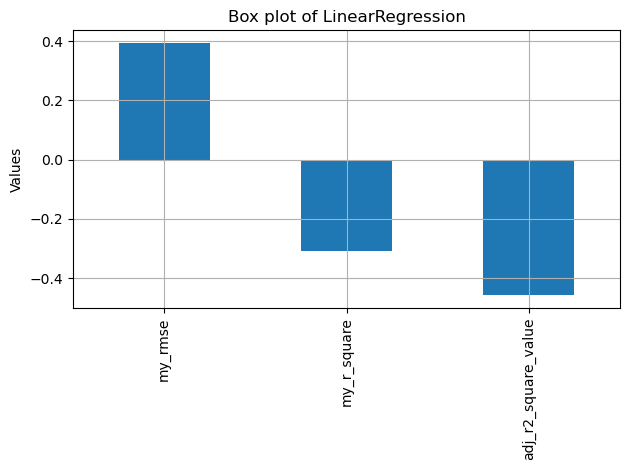

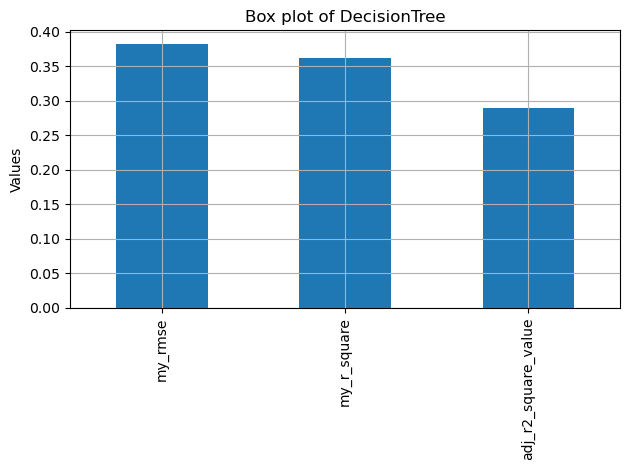

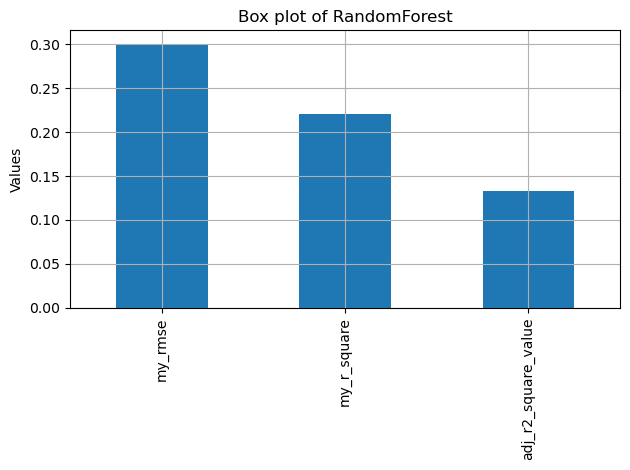

In [53]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Box plot of {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()
for col in a.columns:
    my_model_plot(col)

Text(0, 0.5, 'values')

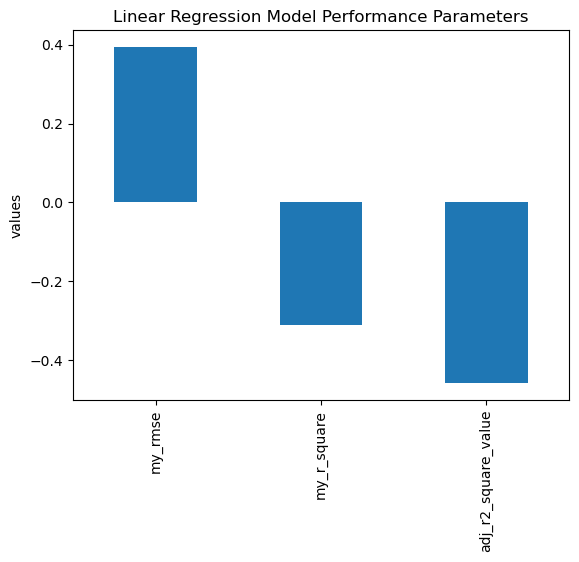

In [54]:
a.LinearRegression.plot(kind="bar")
plt.title("Linear Regression Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

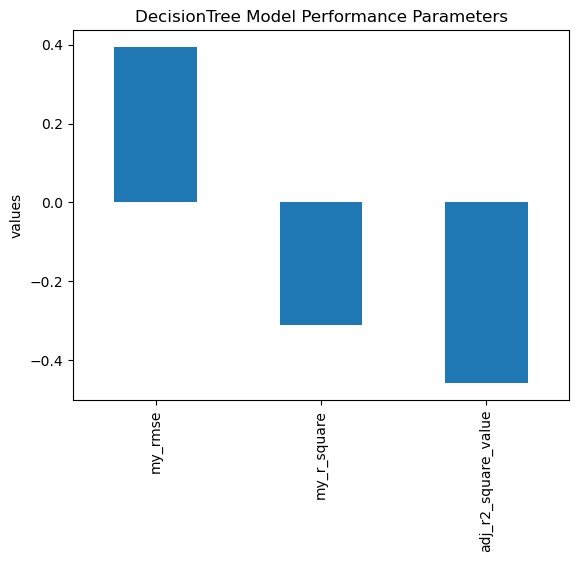

In [55]:
a.LinearRegression.plot(kind="bar")
plt.title("DecisionTree Model Performance Parameters")
plt.ylabel("values")

In [56]:
rf=RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)
rf.fit(x_train,y_train)
rf.predict(x_test)

array([0.73365476, 0.30771032, 0.35910714, 0.08620238, 0.0025    ,
       0.9165    , 0.2865    , 0.88338095, 0.20816667, 0.06572619,
       0.99416667, 0.59907143, 0.2105119 , 0.57911905, 0.27855556,
       0.58889286, 0.986     , 0.        , 0.08620238, 0.        ,
       0.645     , 0.20816667, 0.30771032, 0.35122222, 0.        ,
       0.20214286, 0.25645238, 0.32720238, 0.65070635, 0.22066667,
       0.84428571, 0.        , 0.93833333, 0.05358333, 0.4529881 ,
       0.89216667, 0.1805    , 0.79197619, 0.02966667, 0.57137698,
       0.        , 0.11894048, 0.63642857, 0.025     , 0.92333333,
       0.50391667, 0.58353571, 0.27121429, 0.08666667, 0.70833333,
       0.99333333, 0.19194048, 0.        , 0.94316667, 0.857     ,
       0.8582381 , 0.72283333, 0.98333333, 0.02083333, 0.15340476,
       0.45066667, 0.0145    , 0.74115476, 0.2575    , 0.0025    ,
       0.0415873 , 0.47359524, 0.07777778, 0.2575    , 0.168     ,
       0.986     , 0.11167857, 0.902     , 0.67540476, 0.48794

In [61]:
import pickle
pickle.dump(rf,open("rainfall_prediction.pkl","wb"))